In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

In [90]:
happiness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
...,...,...,...,...,...,...,...,...,...
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [91]:
metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metadata_h.csv')
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
...,...,...,...,...,...
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia
262,ZWE,Sub-Saharan Africa,Lower middle income,NaN,Zimbabwe


In [92]:
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


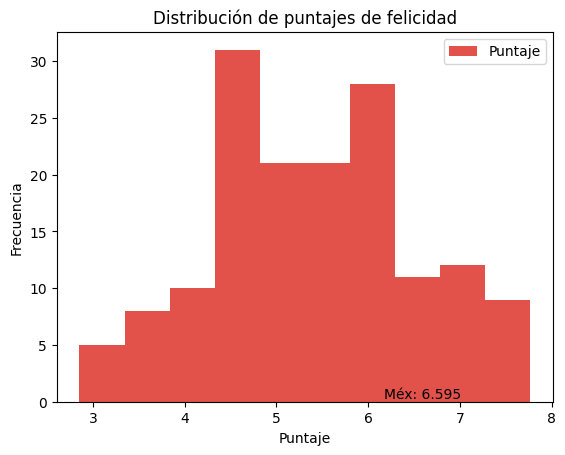

In [93]:
sns.set_palette('Spectral')
plt.hist(x='Score',data=happiness,label='Puntaje')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntajes de felicidad')

mexico_score = mexico['Score'].iloc[0]
plt.text(mexico_score, 0, f'Méx: {mexico_score}', ha='center', va='bottom')

plt.legend()
plt.show()

Text(1.1, 0.961, 'MEX')

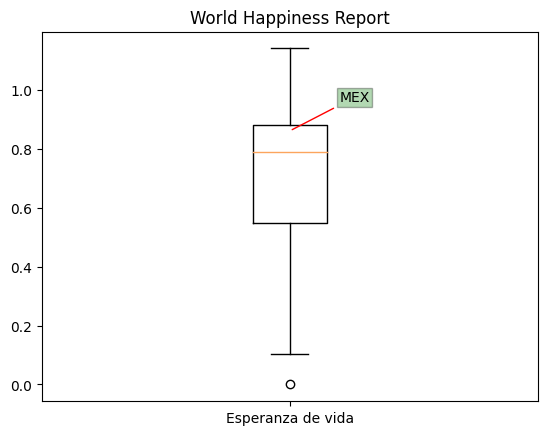

In [94]:
plt.boxplot(happiness['Healthy life expectancy'].dropna(),labels=['Esperanza de vida'])
plt.title('World Happiness Report')
mex = happiness.loc[happiness['Country or region']=='Mexico','Healthy life expectancy'].to_list()[0]
plt.annotate('MEX',xy=(1,mex),xytext=(1.1,mex+0.1),arrowprops=dict(arrowstyle='-',color='red'),bbox=dict(facecolor='green',alpha=0.3,pad=2))

In [95]:
mexicot = mexico.drop('Overall rank',axis=1,inplace=True)
mexicot = mexico.drop('Score',axis=1,inplace=True)
mexicot = mexico.T
mexicot

<ipython-input-95-04b1324c0067>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexicot = mexico.drop('Overall rank',axis=1,inplace=True)
<ipython-input-95-04b1324c0067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexicot = mexico.drop('Score',axis=1,inplace=True)


Country or region,Mexico
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


<Axes: ylabel='Mexico'>

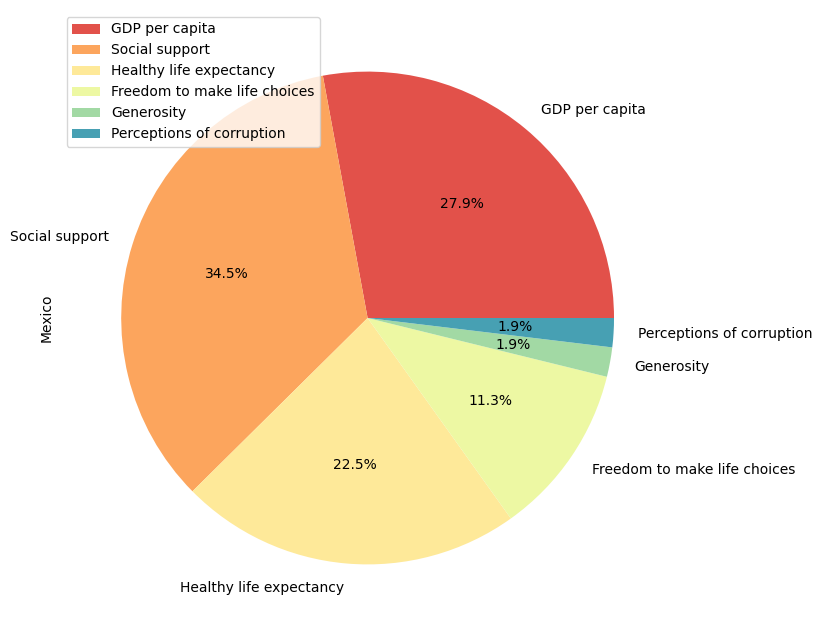

In [96]:
mexicot.plot.pie(y='Mexico',labels=mexicot.index,autopct='%1.1f%%',figsize=(8,8))

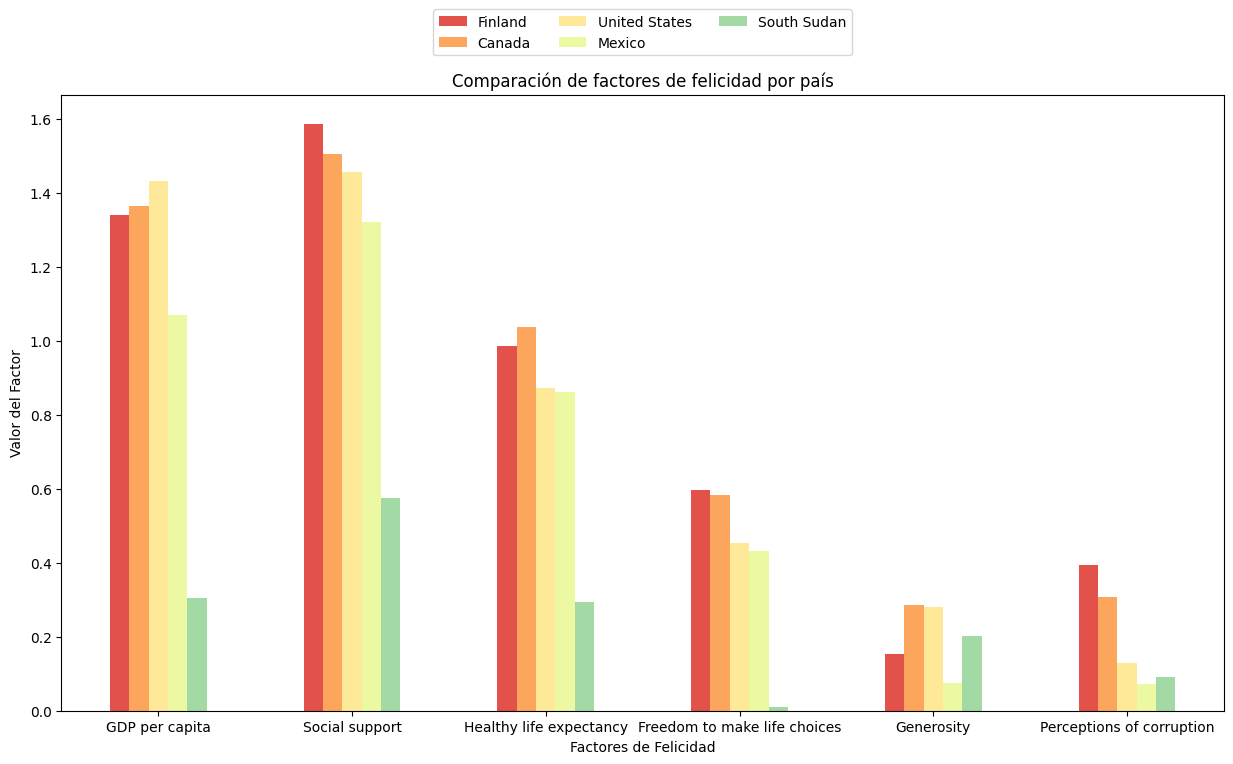

In [97]:
paises = ['Finland', 'South Sudan', 'Mexico', 'United States', 'Canada']
filtered_happiness = happiness[happiness['Country or region'].isin(paises)]
filtered_happiness = filtered_happiness.set_index('Country or region')
filtered_happiness = filtered_happiness.drop(['Overall rank', 'Score'], axis=1, errors='ignore')
filtered_happiness_transposed = filtered_happiness.T


ax = filtered_happiness_transposed.plot(kind='bar', figsize=(15, 8), rot=0)
ax.set_xlabel('Factores de Felicidad')
ax.set_ylabel('Valor del Factor')
ax.set_title('Comparación de factores de felicidad por país')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.show()


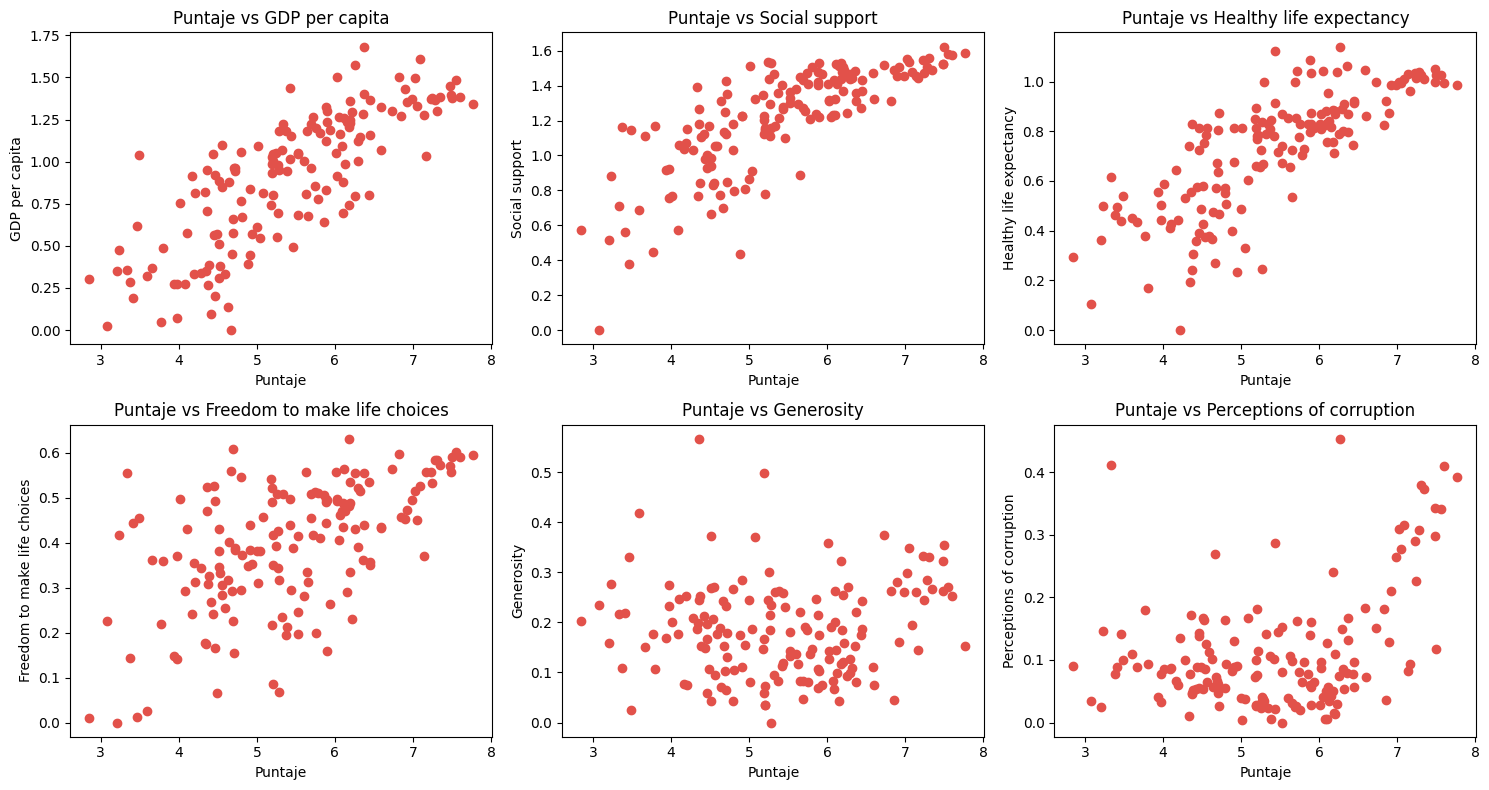

In [98]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for i, factor in enumerate(factors):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(happiness['Score'], happiness[factor])
    axes[row, col].set_xlabel('Puntaje')
    axes[row, col].set_ylabel(factor)
    axes[row, col].set_title(f'Puntaje vs {factor}')
plt.tight_layout()
plt.show()

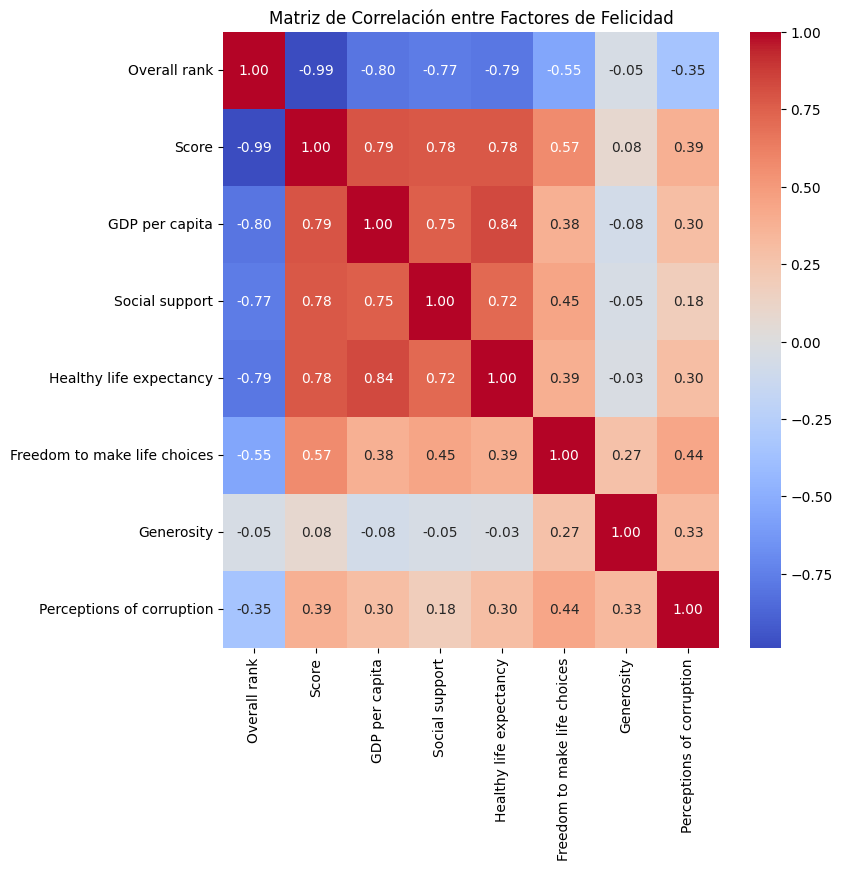

In [99]:
correlation_matrix = happiness.drop('Country or region', axis=1).corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Factores de Felicidad')
plt.show()

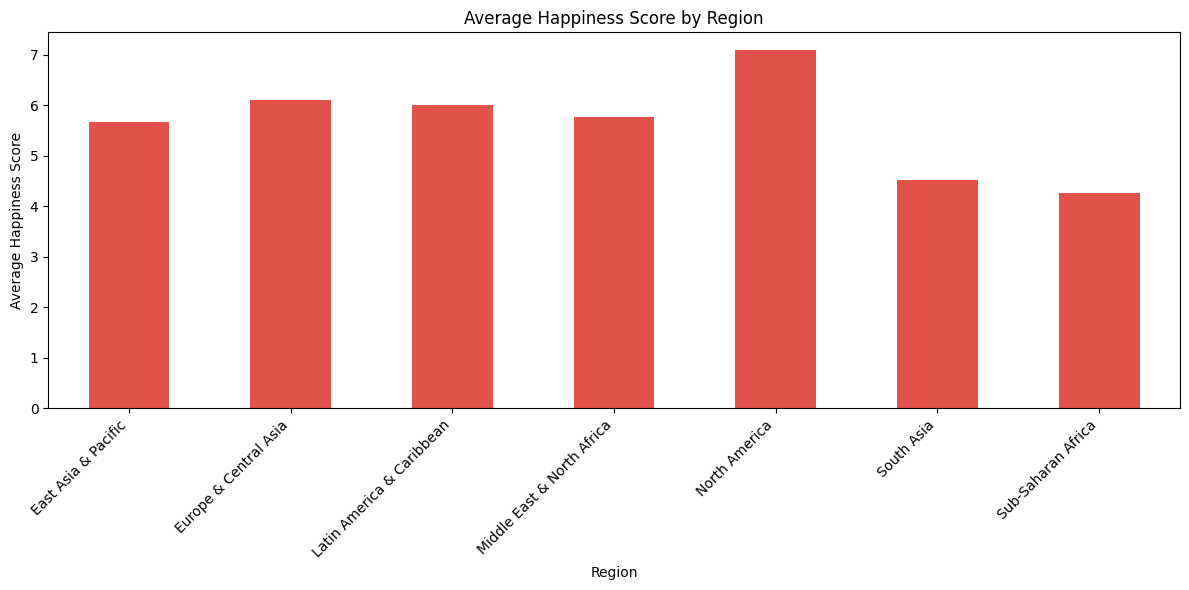

In [100]:
metadata.rename(columns={'TableName': 'Country or region'}, inplace=True)
merged_df = pd.merge(happiness, metadata, on='Country or region', how='left')
promedio_region = merged_df.groupby('Region')['Score'].mean()

plt.figure(figsize=(12, 6))
promedio_region.plot(kind='bar')
plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
